# Proyecto Primer Corte <a class="tocSkip">

Por Luz Rodriguez, David Benavides y Freddy Martinez

version 0.1, Marzo 2021

## Importar librerias

In [140]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib as cm
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
from math import log10

# Importar datos

Datos extraídos de la fuente 'Datos.gob.ar'

Fecha creación: 25 de septiembre de 2020

Datos actualizados por última vez: 12 de febrero de 2021

Fuente: [Datos.gob.ar](https://datos.gob.ar/dataset/justicia-linea-137---victimas-violencia-familiar---llamados-e-intervenciones-domiciliarias/archivo/justicia_21b615fc-001d-43d1-9396-e61f804a32cc) 

In [14]:
path2 = 'C:/Users/57316/OneDrive/Escritorio/Universidas Santoto/Semestre 8/Visualización de datos Python/GitHub/Visual analytics 2/VisualAnalytics/'
datos = pd.read_excel(path2 + 'llamados_violencia_familiar_2017_2021.xlsx', engine = 'openpyxl')
datos.head()

,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha_hora,llamado_provincia,llamado_provincia_id
0,344552.0,Comisaría,Masculino,Otra/o no familiar,Física y psicológica,27,18 a 29 años,Femenino,3,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,2017-01-01 01:37:00,Ciudad Autónoma de Buenos Aires,2
1,344553.0,Comisaría,Femenino,Sin datos,Física y psicológica,Sin dato,Sin dato,Femenino,2,1,Masculino,Hermano/a,Llamante solicitó información y/o orientación,2017-01-01 06:42:00,Ciudad Autónoma de Buenos Aires,2
2,344554.0,Víctima,Femenino,Madre,Física y psicológica,Sin dato,Sin dato,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01 06:48:00,Ciudad Autónoma de Buenos Aires,2
3,344555.0,Víctima,Femenino,No hay niñas/os,Física y psicológica,Sin dato,Sin dato,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01 06:54:00,Ciudad Autónoma de Buenos Aires,2
4,344556.0,Comisaría,Masculino,Otra/o no familiar,Psicológica,Sin dato,Sin dato,Masculino,1,1,Femenino,Madre,Llamante solicitó información y/o orientación,2017-01-01 07:11:00,Ciudad Autónoma de Buenos Aires,2


## Descripción de los datos

En esta base de datos se tiene la información de casos reportados de violencia intrafamiliar, en la base encontramos 16 variables con la siguiente información:

* caso_id: Id de los casos reportados
* llamante_descripcion: Persona que realizo la llamada y reporto el caso de violencia
* llamante_genero: Género de la persona que realizo la llamda
* llamante_vinculo_ninios_presentes: tipo de vinculo del llamante con la victima
* violencia_tipo: Tipo de violencia
* victima_edad: Edad de la victima
* victima_rango_etario: Rango de edad de la victima
* victima_genero: Género de la victima
* victima_cantidad: Cantidad de victimas reportadas en el caso
* agresor_cantidad: Cantidad de agresores reportadas en el caso
* agresor_genero: Género del agresor
* agresor_relacion_victima: Relación de la victima con el agresor
* llamado_derivacion: Información de la acciones tomadas luego de las llamadas
* llamado_fecha_hora: Fecha y hora de la llamada realizada
* llamado_provincia: Provincia en la que se origino el llamado
* llamado_provincia_id: Id de la provincia en la que se origino el llamado

In [17]:
datos.dtypes

caso_id                                     float64
llamante_descripcion                         object
llamante_genero                              object
llamante_vinculo_ninios_presentes            object
violencia_tipo                               object
victima_edad                                 object
victima_rango_etario                         object
victima_genero                               object
victima_cantidad                              int64
agresor_cantidad                              int64
agresor_genero                               object
agresor_relacion_victima                     object
llamado_derivacion                           object
llamado_fecha_hora                   datetime64[ns]
llamado_provincia                            object
llamado_provincia_id                          int64
dtype: object

In [324]:
datos1=datos

In [325]:
datos1.index=datos1.caso_id

In [326]:
datos1.shape

(35703, 16)

In [327]:
datos1=datos1.iloc[:,range(1,16,1)]
datos1.head()

,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha_hora,llamado_provincia,llamado_provincia_id
caso_id,,,,,,,,,,,,,,,
344552.0,Comisaría,Masculino,Otra/o no familiar,Física y psicológica,27,18 a 29 años,Femenino,3,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,2017-01-01 01:37:00,Ciudad Autónoma de Buenos Aires,2
344553.0,Comisaría,Femenino,Sin datos,Física y psicológica,Sin dato,Sin dato,Femenino,2,1,Masculino,Hermano/a,Llamante solicitó información y/o orientación,2017-01-01 06:42:00,Ciudad Autónoma de Buenos Aires,2
344554.0,Víctima,Femenino,Madre,Física y psicológica,Sin dato,Sin dato,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01 06:48:00,Ciudad Autónoma de Buenos Aires,2
344555.0,Víctima,Femenino,No hay niñas/os,Física y psicológica,Sin dato,Sin dato,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01 06:54:00,Ciudad Autónoma de Buenos Aires,2
344556.0,Comisaría,Masculino,Otra/o no familiar,Psicológica,Sin dato,Sin dato,Masculino,1,1,Femenino,Madre,Llamante solicitó información y/o orientación,2017-01-01 07:11:00,Ciudad Autónoma de Buenos Aires,2


# Identificación y retiro de datos faltantes

In [328]:
datos1.isnull().sum()

llamante_descripcion                  0
llamante_genero                       0
llamante_vinculo_ninios_presentes     0
violencia_tipo                       20
victima_edad                          0
victima_rango_etario                  0
victima_genero                        0
victima_cantidad                      0
agresor_cantidad                      0
agresor_genero                        0
agresor_relacion_victima              0
llamado_derivacion                    0
llamado_fecha_hora                    0
llamado_provincia                     0
llamado_provincia_id                  0
dtype: int64

In [329]:
datos1=datos1.dropna()

**Se encontro 20 datos faltante pertenecientes a la variable tipo de violencia, posterior a identificarlos se procedio a eliminarlos.**

# Retiro de datos pertenecientes a " Sin dato"

In [330]:
datos1.victima_edad.value_counts()

Sin dato     12477
Sin dato      2780
30             665
24             606
23             601
             ...  
97               3
98               3
99               3
101              3
100              1
Name: victima_edad, Length: 104, dtype: int64

In [331]:
datos2=datos1[datos1.victima_edad!="Sin dato"]
datos2=datos2[datos2.victima_edad!="Sin dato "]
datos2.shape

(20426, 15)

**Se encontraron 15257 datos sin información, al ser casi la mitad de la base de datos se decide no imputar y se procede a eliminarlos, dejando en la base un total de 20446 resgistros.**

## Duplicados

In [332]:
datos2.index.duplicated().sum()

1771

In [333]:
datos2=datos2[~datos2.index.duplicated()]
datos2.shape

(18655, 15)

**Se encontraron en la base 1771 datos duplicados, posterior a esto se retiraron dejandonos con 18655 registros**

# Tratamiento y limpieza de base por columnas

In [334]:
# Decripción de la persona que realizo la llamada
datos2.llamante_descripcion.replace({"Otra institución":"Otra Institución","Otro/a Particular":"Otro", "Otro/a particular":"Otro", "Otro/a": "Otro"},inplace=True)
datos2.llamante_descripcion.value_counts()

Comisaría           8609
Víctima             5340
Familiar            2474
Vecina/o             650
Otra Institución     566
Otro                 526
Hospital             387
NS/NC                 49
Agresor/a             46
Defensoría             8
Name: llamante_descripcion, dtype: int64

In [335]:
# Vinculos del llamante con la victima
datos2.llamante_vinculo_ninios_presentes.replace({"Hermano/a":"Hermano/o","Otra/o no familiar":"Otro/a no familiar","Otra/o familiar":"Otro familiar","Hermana/o":"Hermano/a"},inplace=True)
datos2.llamante_vinculo_ninios_presentes.value_counts()

Otro/a no familiar    6503
No hay niñas/os       5248
Madre                 3259
Otro familiar         1315
Sin datos              776
NS/NC                  646
Padre                  581
Hermano/o              182
Hermano/a              137
Padrastro                8
Name: llamante_vinculo_ninios_presentes, dtype: int64

In [336]:
# Tipo de violencia
datos2.violencia_tipo.replace({"Física, psicológica y económica":"Económica, física y psicológica","no aplica":"No aplica"},inplace=True)
datos2.violencia_tipo.value_counts()

Física y psicológica                   12431
Psicológica                             5332
Económica, física y psicológica          371
Económica y psicológica                  169
Sexual y psicológica                     159
Física, sexual y psicológica             137
Otras                                     31
Sexual, económica y psicológica           10
No es un caso de Violencia Familiar        8
No aplica                                  7
Name: violencia_tipo, dtype: int64

In [337]:
# Rango de la edad de la victima
datos2.victima_rango_etario.replace({"06 a 11 años":"6 a 11 años"},inplace=True)
datos2.victima_rango_etario.value_counts()

18 a 29 años      5782
30 a 39 años      4292
40 a 49 años      2740
Más de 60 años    1649
12 a 17 años      1414
50 a 59 años      1128
6 a 11 años        888
0 a 5 años         762
Name: victima_rango_etario, dtype: int64

In [338]:
# Cantidad de victimas y cantidad agresores
datos2=datos2[datos2.victima_cantidad!= 0]
datos2=datos2[datos2.agresor_cantidad!= 0]
datos2=datos2[datos2.agresor_cantidad!= 51]

In [339]:
# Relación del agresor con la victima
datos2=datos2[datos2.agresor_relacion_victima!= 'Madrastra']
datos2.agresor_relacion_victima.replace({"Hermana/o":"Hermano/a"},inplace=True)
datos2.agresor_relacion_victima.value_counts()

Pareja                   7057
Ex pareja                4738
Madre                    1630
Padre                    1409
Hijo/a                   1331
Hermano/a                 780
Otro/a no conviviente     509
Otro/a conviviente        357
Padrastro                 325
NS/NC                     313
Abuelo/a                   73
Name: agresor_relacion_victima, dtype: int64

In [340]:
# Información de la acciones tomadas luego de las llamadas
datos2.llamado_derivacion.replace({"Comunicación con los Equipos Móviles":"Comunicación con Equipos Móviles"},inplace=True)
datos2.llamado_derivacion.value_counts()

Llamante solicitó información y/o orientación                             8748
La víctima no aceptó la intervención del Equipo Móvil                     3912
No se desplazó un  Equipo móvil por tratarse de un caso fuera de CABA     2163
No había móviles y/o Equipos para realizar la intervención                1520
Desplazamiento de un Equipo Móvil a donde se encontraba la/s víctima/s    1274
Se planificó intervención para otro momento                                580
Está interviniendo o se deriva a otra institución                          320
Comunicación con Equipos Móviles                                             3
Se trata de un conflicto familiar                                            2
Name: llamado_derivacion, dtype: int64

**Se econtraron en algunas de la variables categoricas, problemas de coherencia y categorias que se repetian a causa de un carater de mas o problemas de espacios en la digitación, por lo tanto se procedio a unificar estas categorias y en otras quitarlas por ser datos atipicos.**

In [341]:
datos2['llamado_fecha_hora'] = datos2['llamado_fecha_hora'].astype('str')
datos2['llamado_fecha_hora'].dtype

dtype('O')

In [342]:
fe=pd.DataFrame(datos2["llamado_fecha_hora"].str.split(' ',expand=True))

In [343]:
datos2["llamado_fecha"]=fe.iloc[:,0]
datos2["llamado_hora"]=fe.iloc[:,1]

In [344]:
datos2=datos2.drop(["llamado_fecha_hora"],axis=1)

In [447]:
datos2.head(3)

,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_provincia,llamado_provincia_id,llamado_fecha,llamado_hora,Mes
caso_id,,,,,,,,,,,,,,,,,
344552.0,Comisaría,Masculino,Otro/a no familiar,Física y psicológica,27,18 a 29 años,Femenino,3,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,Ciudad Autónoma de Buenos Aires,2,2017-01-01,01:37:00,1
344557.0,Comisaría,Masculino,Otro/a no familiar,Física y psicológica,35,30 a 39 años,Femenino,4,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,Ciudad Autónoma de Buenos Aires,2,2017-01-01,07:23:00,1
344559.0,Comisaría,Masculino,Otro/a no familiar,Física y psicológica,25,18 a 29 años,Femenino,1,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,Ciudad Autónoma de Buenos Aires,2,2017-01-01,07:38:00,1


**Se procedio a separar la fecha y la hora de la variable 'llamado_fecha_hora' en dos columnas nombradas 'llamado_fecha' y 'llamado_hora' respectivamente.**

# Visualización

In [ ]:
datos2['llamado_fecha'] = pd.to_datetime(datos2['llamado_fecha'],format='%Y/%m/%d')
datos2['llamado_fecha'].head()
datos2['Mes'] = datos2['llamado_fecha'].dt.month 

In [ ]:
datos4=datos2
datos4=datos4[datos4.victima_genero!= 'Transgénero']
datos4=datos4[datos4.victima_genero!= 'NS/NC']
datos4=datos4[datos4.violencia_tipo!= 'No aplica']
datos4=datos4[datos4.violencia_tipo!= 'No es un caso de Violencia Familiar']

In [ ]:
datos4.violencia_tipo.replace({"Física, sexual y psicológica":"Sexual y psicológica","Sexual, económica y psicológica":"Sexual y psicológica"},inplace=True)
datos4.violencia_tipo.value_counts()

In [ ]:
datos4.agresor_relacion_victima.replace({"Madre":"Padre/Madre","Padre":"Padre/Madre","Otro/a no conviviente":"Otro","Otro/a conviviente":"Otro"},inplace=True)
datos4=datos4[datos4.agresor_relacion_victima!= 'NS/NC']

In [426]:
tab4 = datos4['agresor_relacion_victima'].value_counts().rename_axis('label').reset_index(name='counts')
tab4

,label,counts
0,Pareja,7011
1,Ex pareja,4715
2,Padre/Madre,2994
3,Hijo/a,1322
4,Otro,861
5,Hermano/a,769
6,Padrastro,322
7,Abuelo/a,73


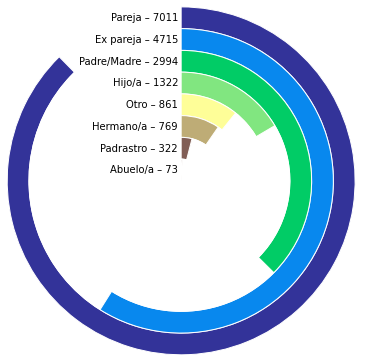

In [451]:
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10



labels = tab4['label']
data = tab4['counts']
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)


#radius of donut chart
r = 2
#calculate width of each ring
w = r / n 


#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")


#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], 
                           data[i]], 
                          radius = r - i * w, 
                          startangle = 90, 
                          labels = ["", labels[i]], 
                          labeldistance = 1 - 1 / (1.5 * (n - i)), 
                          textprops = {"alpha": 0}, 
                          colors = ["white", colors[i]])
    plt.setp(innerring, 
             width = w, 
             edgecolor = "white")
    radius = r - i * w
    plt.text(0, radius - w / 2, f'{labels[i]} – {data[i]} ', ha='right', va='center')
        
#plt.legend()
plt.show()

<Figure size 1440x1080 with 0 Axes>

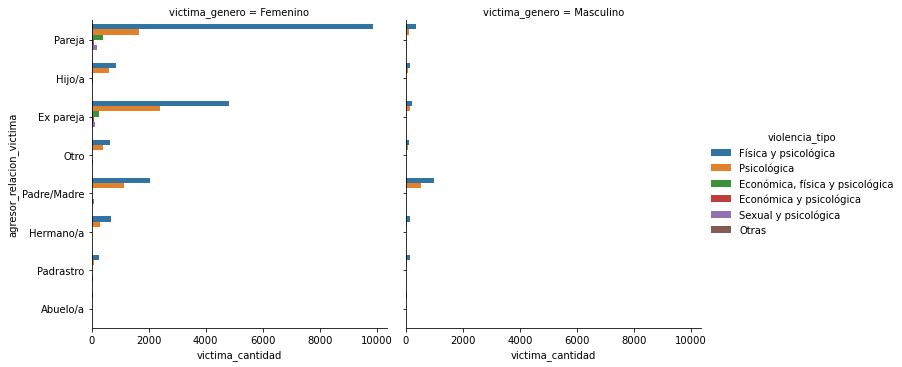

In [449]:
fig=plt.figure(figsize = (20,15))
fig=sns.catplot(data = datos4,
            kind = "bar",
            estimator = sum,
            x = "victima_cantidad",
            y = "agresor_relacion_victima",
            hue = "violencia_tipo",
            col = "victima_genero",
            #palette = 'magma',
            ci = None)

## **¿Que?**

El gráfico muestra la cantidad de victimas de violencia intrafamiliar desagredas por tres variables cualitativas, la primera correponde a la variable **victima_genero** la cual, cuenta con las categorias Femenino y Masculino, la segunda variable aquivale a **agresor_relacion_victima** la cual, presenta como categorias: Pareja, Hijo/a, Ex pareja, Padre/Madre, Hermano/a, Padrastro, Abuelo/a y otro, finalmente la ultima variable corresponde a **violencia_tipo** la cual tiene como catergorias Física y psicologica, Psicologica, Economica, Fisica y psicologica, Ecnomica y psicologica, Sexual y psicologica y otras. Por lo tanto se puede decir que el de dataset es de tipo tabla con datos estaticos, ya que cuenta con varios atributos e items los cuales representan los registros por  cada caso de violencia intrafamiliar.

* Tipo de Dataset: Tabla

* Tipos de datos: 

 - items 
 
 - Atributos cualitativos


## **¿Por que?**

La gráfica **analiza** y **explora**, ya que el proposito de la gráfica es **identificar** en que casos se da mas la violencia intrafamiliar, siendo el genero de la victima un variable cable, pues se puede observar que el mayor número de casos se presenta para el genero femenino, ademas de esto, la gráfica también nos muestra que la pareja es el vinculo entre victima y agresor más frecuente, es decir la que reporta mas casos con Fisica y psicologica como el tipo de violencia mas frecuente.

Por otro lado el gráfico además de **identificar** tambien **compara** pues la gráfica al tener dos columnas logra el efecto de comparación que como ya se dijo anteriormente para este caso es el genero de la victima, el tipo de violencia y el vinculo del agresor con la victima. En los objetivos de la grafica podemos observar como atributo la distribución ya que la gráfica nos permite observar que caracteristicas presentan los datos, y de cierta forma tambien como se comportan. 

**1. Actions**

* Analizar: 

 - Consumir: Explorar

* Especificas:

 - Buscar: lookup
 - Consulta: Identificar y comparar


**2. Objetivos**

* Atributos: Distribución

## ¿Como?

Se evidencia en la visualización que la información se **codifica** de forma **alineada** ya que la información esta presentada en el eje y de forma alineada y ordenada con respecto a la mayor cantidad de víctimas, de esta forma se tendrá mejores comparaciones visualmente.

1. Codificar

 * Organización: Alineada
 
 * Map: Color (matiz)

## Marcas y Canales

La marca para este gráfico son las líneas, estas se observan tanto eje vertical y horizontal como en la representación de la variable cuantitativa **víctima_ cantidad** que nos da la cantidad de víctimas de violencia intrafamiliar con respecto a las variables categóricas, por otro lado las marcas presentadas son la posición, tamaño y color, esta marca permite identificar y diferenciar en el grafico la categorias de cada variable.

1. Marca

 * Marca de linea
 
2. Canal
 
 * Posición: Canal de posición espacial horizontal para el atributo cuantitativo y vertical para el atributo categórico
 
 * Tamaño : Largo de la marca
 
 * Color: Canal de color para cada categoria de la tercera variable categorica **violencia_tipo**.